### Import libraries and load dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%autocall 2
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

Automatic calling is: Full


In [ ]:
df = pd.read_csv("/content/drive/My Drive/DataAnalysis/HeartDisease/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Description 

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset does not contain any missing values so this is a good start.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Oldest instance is 77 years old and the average of ages is  55.Youngest instance is 29 years old.There are 303 total of instances in the dataset with some values pointed out as binary like gender which is stated as 1 and 0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
for column in df:
  print(column," : ",df[column].unique())
  print("------------------------------------------------------------------------------------------------------------------")

age  :  [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
------------------------------------------------------------------------------------------------------------------
sex  :  [1 0]
------------------------------------------------------------------------------------------------------------------
cp  :  [3 2 1 0]
------------------------------------------------------------------------------------------------------------------
trestbps  :  [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
------------------------------------------------------------------------------------------------------------------
chol  :  [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 26

### EDA

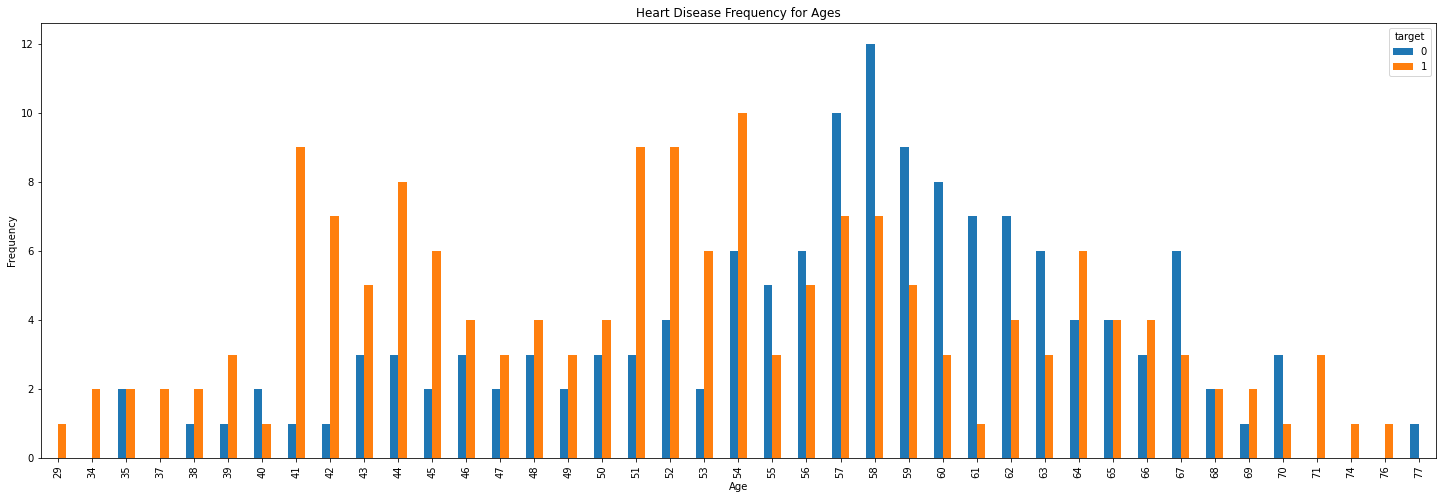

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

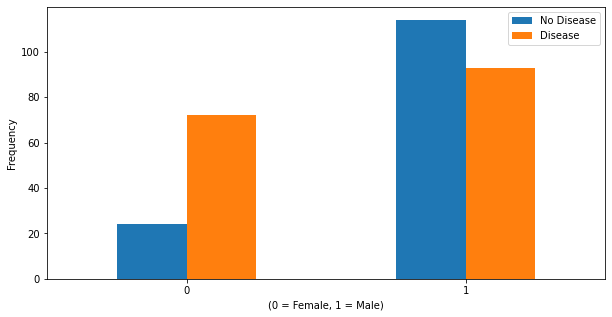

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('(0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

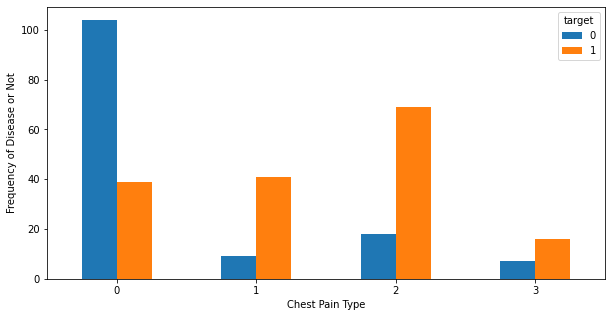

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

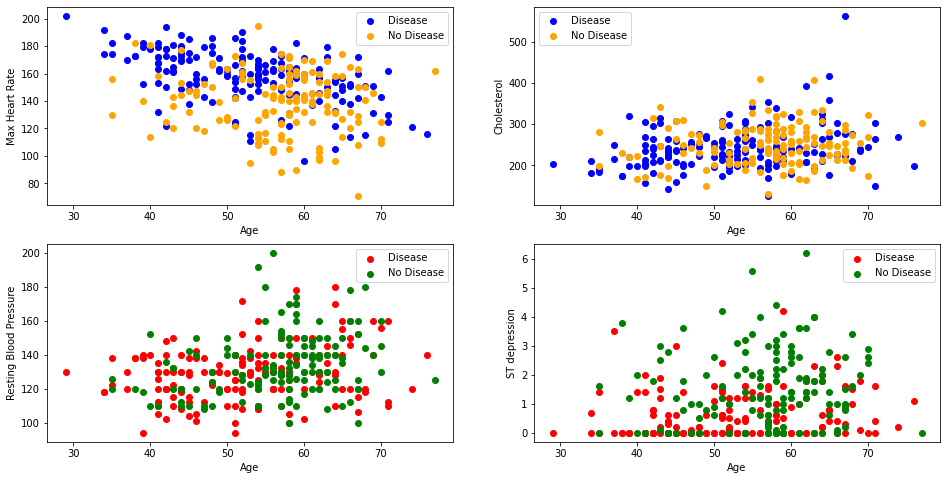

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='orange')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.chol[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.chol[df.target==0],c='orange')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.trestbps[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.trestbps[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

The dataset is almost clear for pre-processing since every column is ranged with regarding numbers.We must deal with few of them.There exists some ordinal data and some categorical data and these data must not be presented in the same manner,some data will be encoded properly.

In [ ]:
categories = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
for category in categories:
  df[category] = df[category].astype('category')


In [ ]:
df = pd.get_dummies(df)
df.head() 

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(303, 31)

In [ ]:
target = df['target']
df.drop(columns=['target'],axis=1,inplace = True)
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
scaled_df = StandardScaler().fit_transform(df)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df,target,test_size=0.33,random_state=42)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(30,)))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

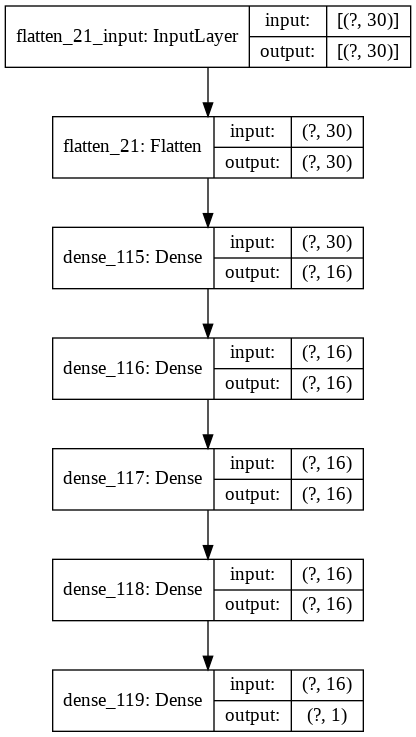

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X_train,y_train,epochs=30,batch_size=1)

Epoch 1/30
203/203 [==============================] - 0s 1ms/step - loss: 0.5544 - accuracy: 0.7833
Epoch 2/30
203/203 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8424
Epoch 3/30
203/203 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8768
Epoch 4/30
203/203 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.8719
Epoch 5/30
203/203 [==============================] - 0s 1ms/step - loss: 0.2540 - accuracy: 0.8916
Epoch 6/30
203/203 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.8966
Epoch 7/30
203/203 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9015
Epoch 8/30
203/203 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.9113
Epoch 9/30
203/203 [==============================] - 0s 1ms/step - loss: 0.1774 - accuracy: 0.9261
Epoch 10/30
203/203 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.9310

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.84      0.84      0.84        58

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred.round()))

0.82
